In [99]:
#Let import all the libraies we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
pd.set_option('display.max_columns', None)

In [61]:
#Lets load the dataset
df_car = pd.read_csv('Car Price Prediction Assignment/CarPrice_Assignment.csv')

In [62]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#Statistics about the data
df_car.describe(percentiles=(0.25, 0.50, 0.75, 0.85, 0.95, 0.99, 1))

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
85%,174.400000,2.000000,104.660000,188.200000,68.340000,56.100000,3101.000000,162.200000,3.620000,3.500000,9.500000,152.000000,5500.000000,31.000000,38.000000,18500.000000
95%,194.800000,3.000000,110.000000,196.360000,70.460000,57.500000,3503.000000,201.200000,3.780000,3.640000,21.820000,180.800000,5980.000000,37.000000,42.800000,32472.400000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


In [10]:
#Length of dataset
df_car.shape

(205, 26)

In [11]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
#Check missing data
df_car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
#Cleaning the dataset

In [13]:
#Dropping duplicates in the data
print(df_car.shape)
print(df_car.drop_duplicates().shape)

(205, 26)
(205, 26)


In [16]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
#Creting brand out of carname
CompanyName = df_car['CarName'].apply(lambda x: x.split()[0])
df_car.insert(3, "CompanyName", CompanyName)
df_car.drop(['CarName'], axis=1, inplace=True)
df_car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [64]:
#Check all unique company cars
df_car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [65]:
#Correcting the car names
df_car['CompanyName'] = df_car['CompanyName'].str.lower()
df_car['CompanyName'].replace('maxda', 'mazda', inplace=True)
df_car['CompanyName'].replace('porcshce', 'porsche', inplace=True)
df_car['CompanyName'].replace('toyouta', 'toyota', inplace=True)
df_car['CompanyName'].replace('vokswagen', 'volkswagen', inplace=True)
df_car['CompanyName'].replace('vw', 'volkswagen', inplace=True)

In [24]:
#Check all unique company cars
df_car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [25]:
#Checking ratio of each binary features
df_car['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [26]:
#Checking ratio of each binary features
df_car['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [27]:
#Checking ratio of each binary features
df_car['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [28]:
#Checking ratio of each binary features
df_car['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [29]:
#Checking ratio of each binary features
df_car['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [30]:
#Checking ratio of each binary features
df_car['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [31]:
#Checking ratio of each binary features
df_car['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [32]:
#Checking ratio of each binary features
df_car['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

C:\Users\ramsu\AppData\Local\Temp\ipykernel_6352\1887095268.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_car['price'])


<Axes: xlabel='price', ylabel='Density'>

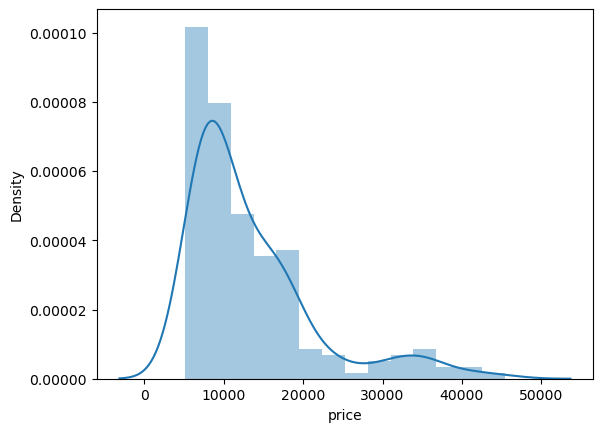

In [33]:
#Distribution plot for price
sns.distplot(df_car['price'])

In [36]:
print('Median:',df_car['price'].median())
print('Mean:',df_car['price'].mean())
print('Variance:',df_car['price'].var())

Median: 10295.0
Mean: 13276.710570731706
Variance: 63821761.57839796


In [ ]:
#Exploratory data Analysis

In [66]:
#Creating a derived feature as total_mpg
total_mpg = (55*df_car['citympg']/100)+(45*df_car['highwaympg']/100)
df_car.insert(4, "total_mpg", total_mpg)

In [67]:
df_car.head()

,car_ID,symboling,CompanyName,fueltype,total_mpg,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,23.70,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,23.70,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,22.15,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,26.70,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,19.80,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [68]:
#Drop unnecessary features
df_car.drop(['car_ID', 'citympg', 'highwaympg'], axis=1, inplace=True)

In [71]:
df_car['symboling'] = df_car['symboling'].astype(str)
df_car['symboling'].value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

In [72]:
#Dividing the dataset into cont. and cat. variables
coninuous_df = df_car[df_car.describe().columns]
categorical_df = df_car.drop(coninuous_df, axis=1)

In [44]:
#Lets see categorical variables
categorical_df.columns

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

Text(0.5, 1.0, 'Company Name vs Average Price of Car')

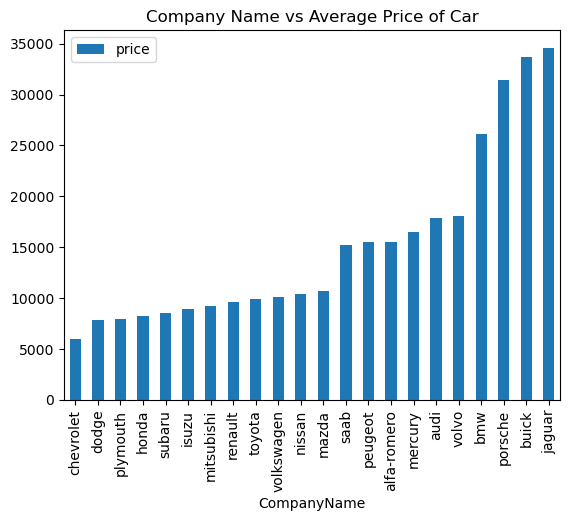

In [46]:
#Company name vs Price Plot
df = df_car.groupby('CompanyName')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('Company Name vs Average Price of Car')

Text(0.5, 1.0, 'Symboling vs Average Price of Car')

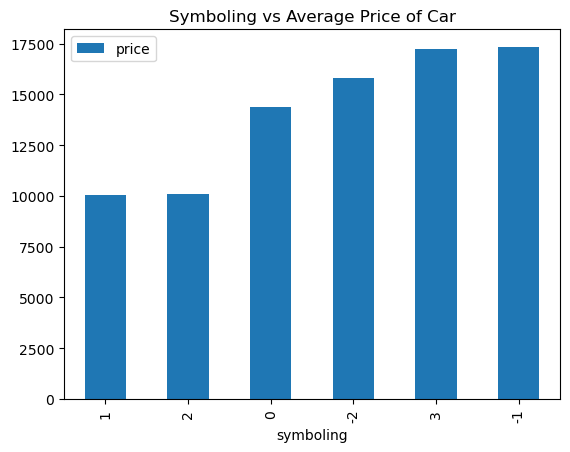

In [47]:
#symboling vs Price Plot
df = df_car.groupby('symboling')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('Symboling vs Average Price of Car')

<Axes: xlabel='symboling', ylabel='price'>

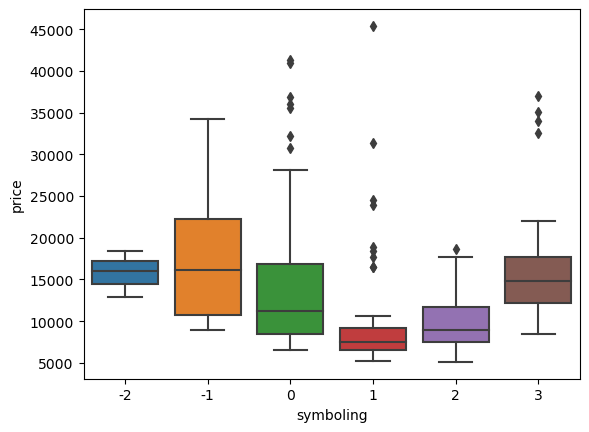

In [49]:
sns.boxplot(data=df_car, x='symboling', y='price')

Text(0.5, 1.0, 'FuelType vs Average Price of Car')

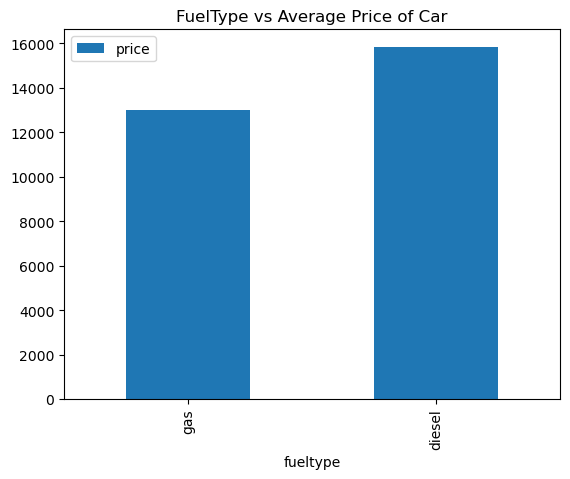

In [50]:
#FuelType vs Price Plot
df = df_car.groupby('fueltype')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('FuelType vs Average Price of Car')

Text(0.5, 1.0, 'Aspiration vs Average Price of Car')

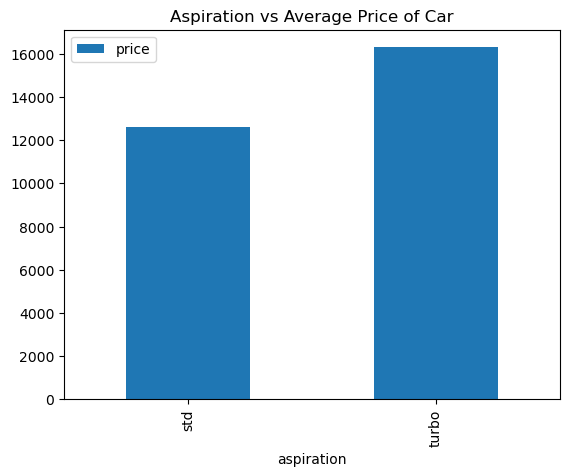

In [51]:
#Aspiration vs Price Plot
df = df_car.groupby('aspiration')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('Aspiration vs Average Price of Car')

Text(0.5, 1.0, 'Doornumber vs Average Price of Car')

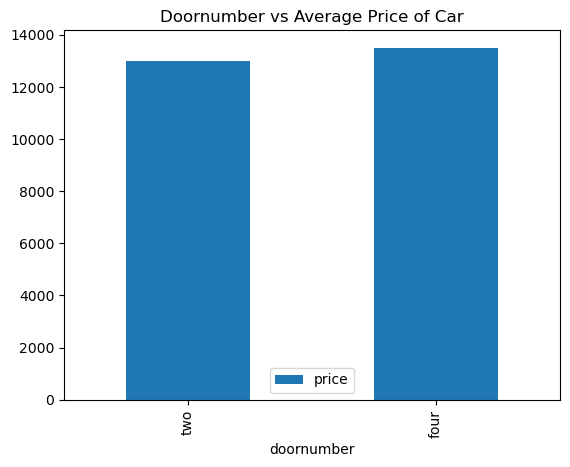

In [52]:
#Doornumber vs Price Plot
df = df_car.groupby('doornumber')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('Doornumber vs Average Price of Car')

Text(0.5, 1.0, 'Car Body vs Average Price of Car')

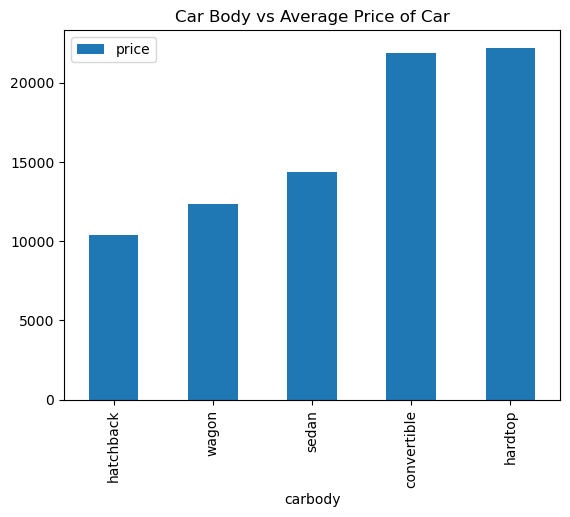

In [53]:
#Car Bidy vs Price Plot
df = df_car.groupby('carbody')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('Car Body vs Average Price of Car')

Text(0.5, 1.0, 'Drivewheel vs Average Price of Car')

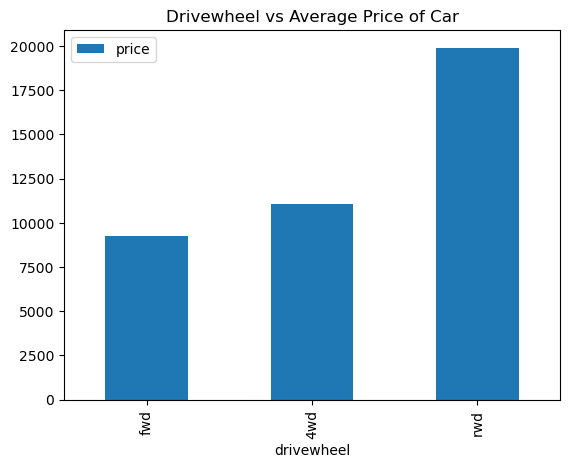

In [54]:
#Drivewheel vs Price Plot
df = df_car.groupby('drivewheel')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('Drivewheel vs Average Price of Car')

Text(0.5, 1.0, 'Engine Location vs Average Price of Car')

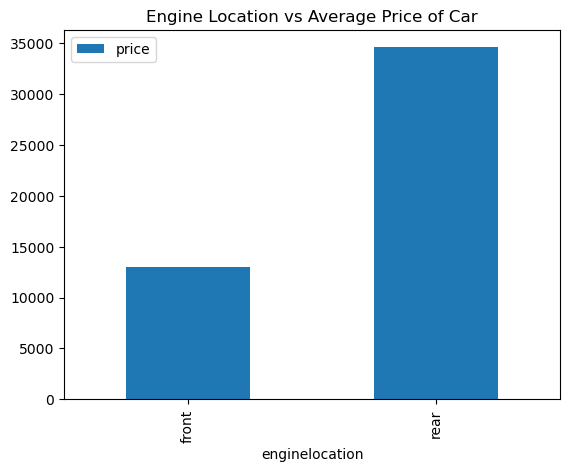

In [55]:
#Engine Location vs Price Plot
df = df_car.groupby('enginelocation')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('Engine Location vs Average Price of Car')

Text(0.5, 1.0, 'Engine Type vs Average Price of Car')

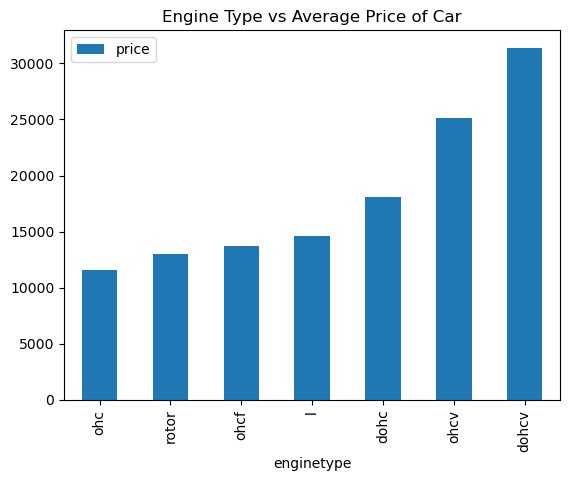

In [56]:
#Engine Type vs Price Plot
df = df_car.groupby('enginetype')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('Engine Type vs Average Price of Car')

Text(0.5, 1.0, 'ECylinderNumber vs Average Price of Car')

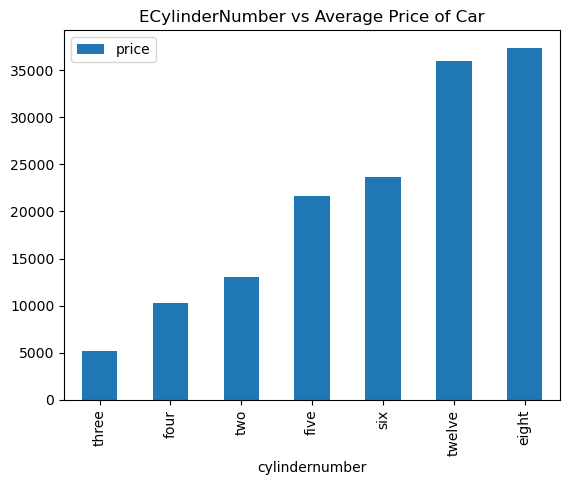

In [57]:
#CylinderNumber vs Price Plot
df = df_car.groupby('cylindernumber')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('ECylinderNumber vs Average Price of Car')

Text(0.5, 1.0, 'FuelSystem vs Average Price of Car')

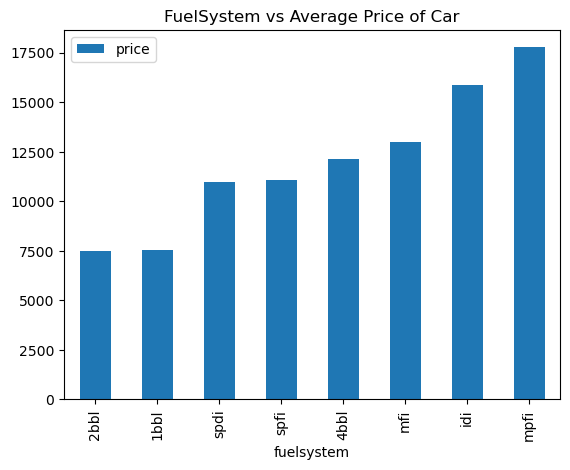

In [58]:
#FuelSystem vs Price Plot
df = df_car.groupby('fuelsystem')['price'].mean().sort_values()
df = pd.DataFrame(df)
df.plot.bar()
plt.title('FuelSystem vs Average Price of Car')

In [73]:
#Visualize continuous variables
coninuous_df.columns

Index(['total_mpg', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price'],
      dtype='object')

C:\Users\ramsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


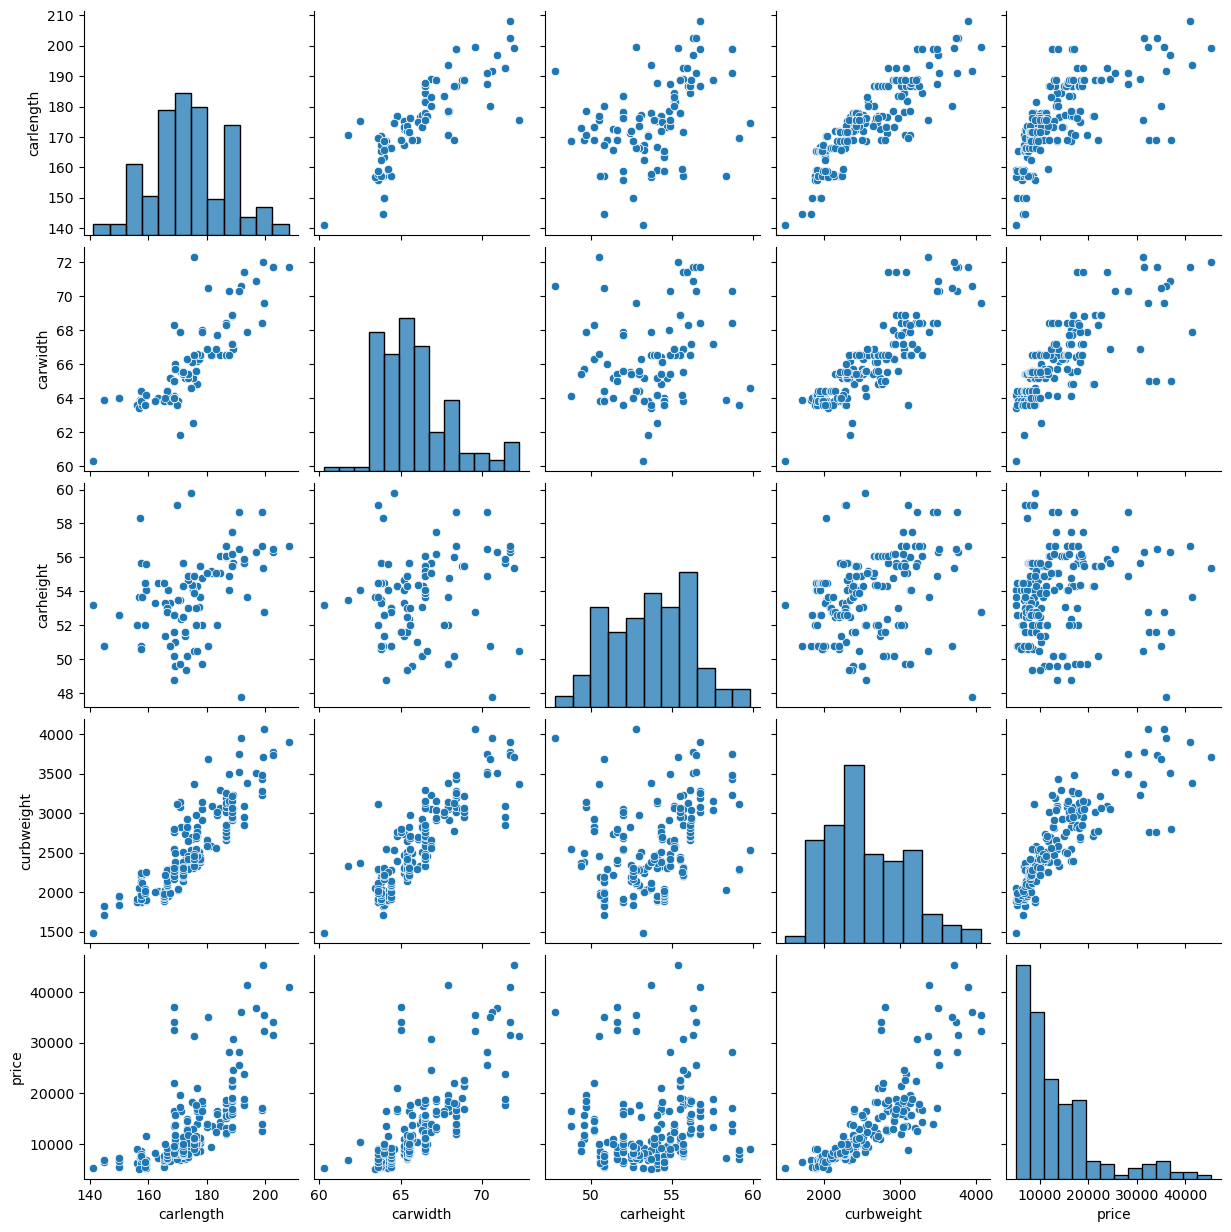

In [74]:
df=df_car[['carlength', 'carwidth', 'carheight', 'curbweight', 'price']]
sns.pairplot(df)

C:\Users\ramsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


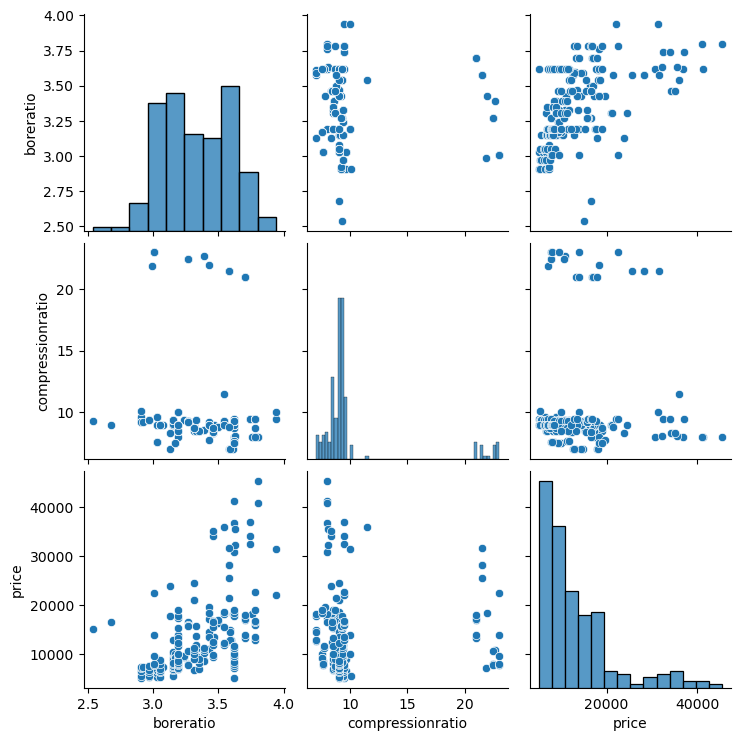

In [75]:
df=df_car[['boreratio', 'compressionratio','price']]
sns.pairplot(df)

C:\Users\ramsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


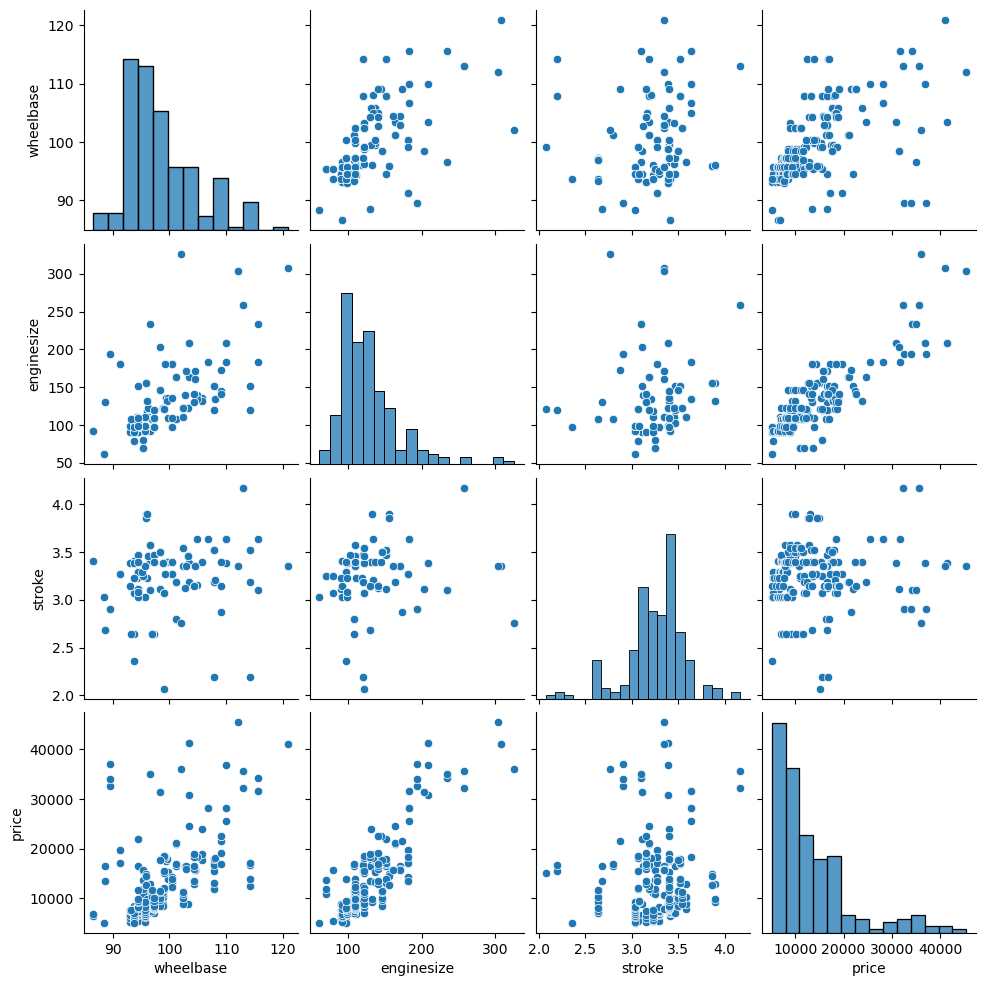

In [77]:
df=df_car[['wheelbase', 'enginesize', 'stroke', 'price']]
sns.pairplot(df)

C:\Users\ramsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


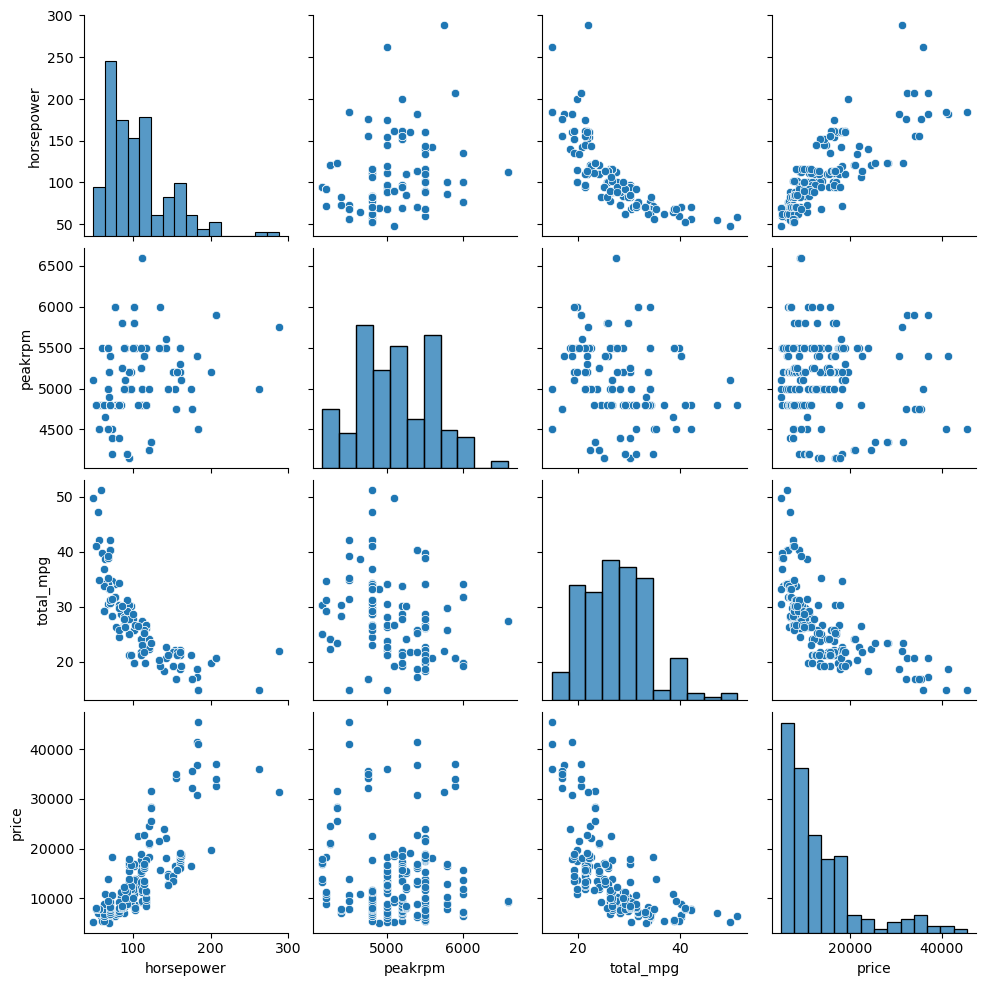

In [78]:
df=df_car[['horsepower', 'peakrpm', 'total_mpg', 'price']]
sns.pairplot(df)

<Axes: >

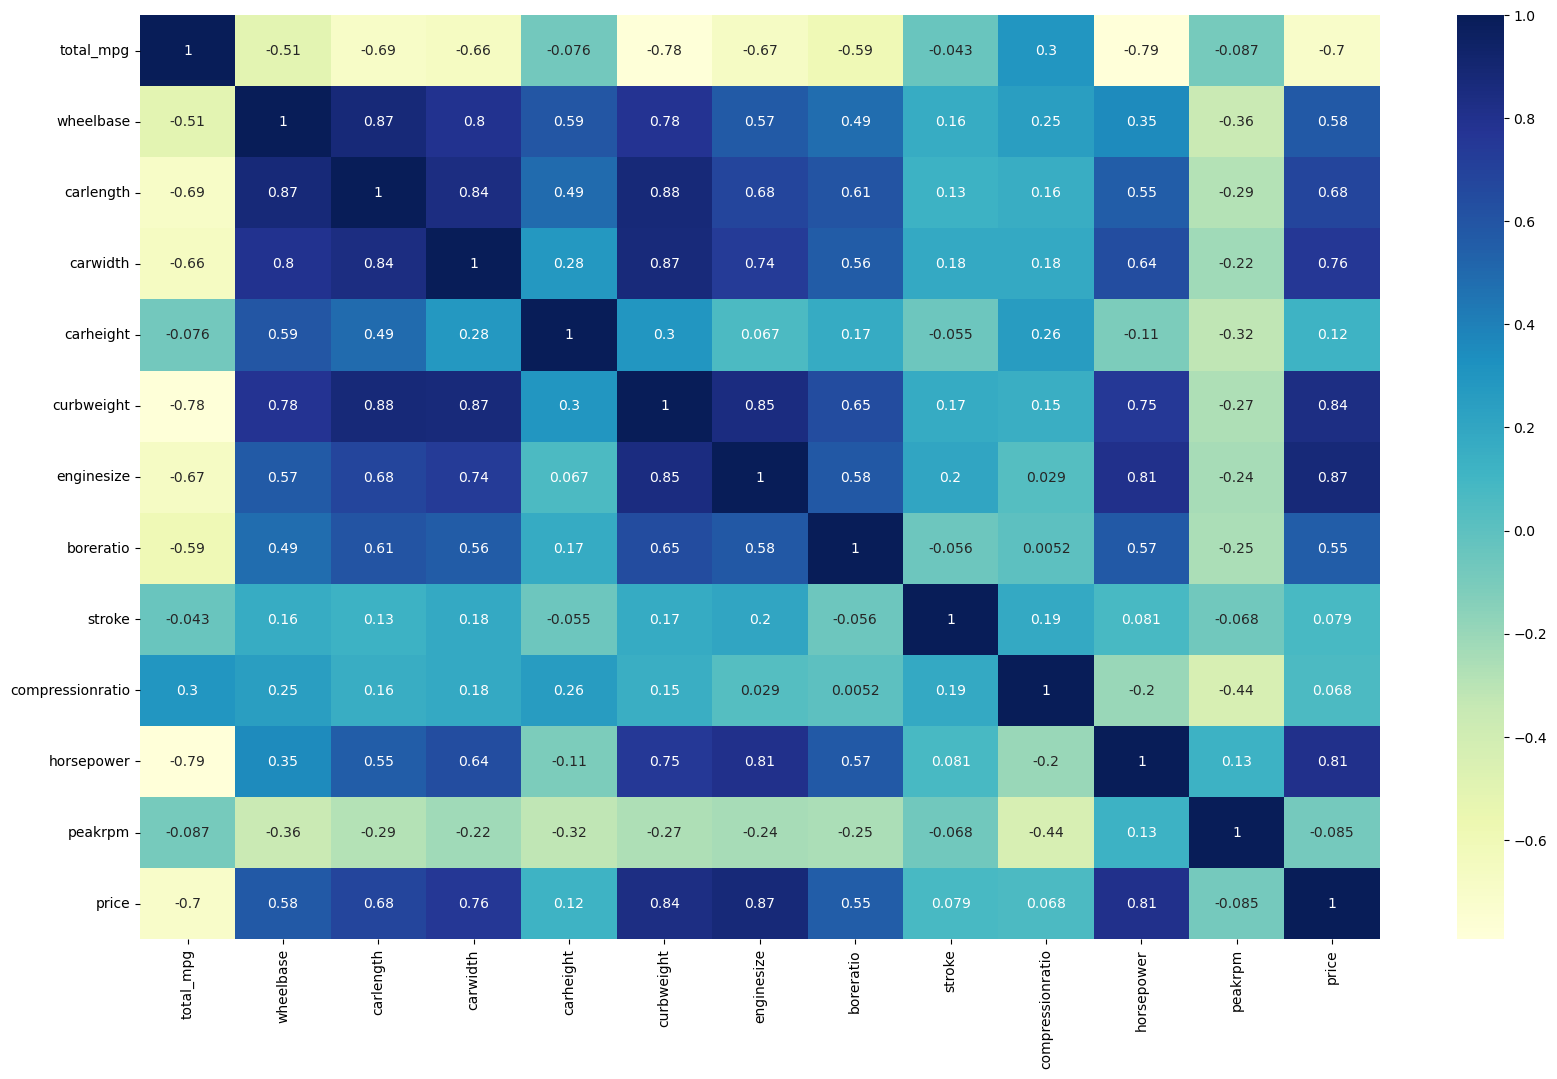

In [87]:
#heat map for whole df
plt.figure(figsize=(20,12))
sns.heatmap(coninuous_df.corr(), annot=True, cmap="YlGnBu")

In [89]:
df_car.drop(['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'symboling'], axis=1, inplace=True)

In [90]:
master_df = df_car.copy()

In [91]:
master_df.head()

,CompanyName,fueltype,total_mpg,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,price
0,alfa-romero,gas,23.70,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,13495.0
1,alfa-romero,gas,23.70,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,16500.0
2,alfa-romero,gas,22.15,std,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,154,16500.0
3,audi,gas,26.70,std,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,102,13950.0
4,audi,gas,19.80,std,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,115,17450.0


In [92]:
#Create a function theat will create dummy variable as well as append it to original df and drop the orignal feat
def dummy(col, df):
    temp = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop([col], axis=1, inplace=True)
    return df

In [ ]:
#Apply the dummy fn
master_df = dummy('CompanyName', master_df)
master_df = dummy('fueltype', master_df)
master_df = dummy('aspiration', master_df)
master_df = dummy('carbody', master_df)
master_df = dummy('drivewheel', master_df)
master_df = dummy('enginetype', master_df)
master_df = dummy('cylindernumber', master_df)
master_df = dummy('doornumber', master_df)
master_df = dummy('enginelocation', master_df)
master_df = dummy('fuelsystem', master_df)

In [95]:
master_df.head()

,total_mpg,carlength,carwidth,curbweight,enginesize,horsepower,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,23.70,168.8,64.1,2548,130,111,13495.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
1,23.70,168.8,64.1,2548,130,111,16500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,22.15,171.2,65.5,2823,152,154,16500.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
3,26.70,176.6,66.2,2337,109,102,13950.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,19.80,176.6,66.4,2824,136,115,17450.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [96]:
#remove the columns which has low corr. with price
low_corr_col = master_df.corr()[(master_df.corr()['price']<0.5) & (master_df.corr()['price']>=-0.5)]
low_corr_col=low_corr_col.reset_index()['index']
low_corr_col=list(low_corr_col)
master_df.drop(low_corr_col, axis=1, inplace=True)

<Axes: >

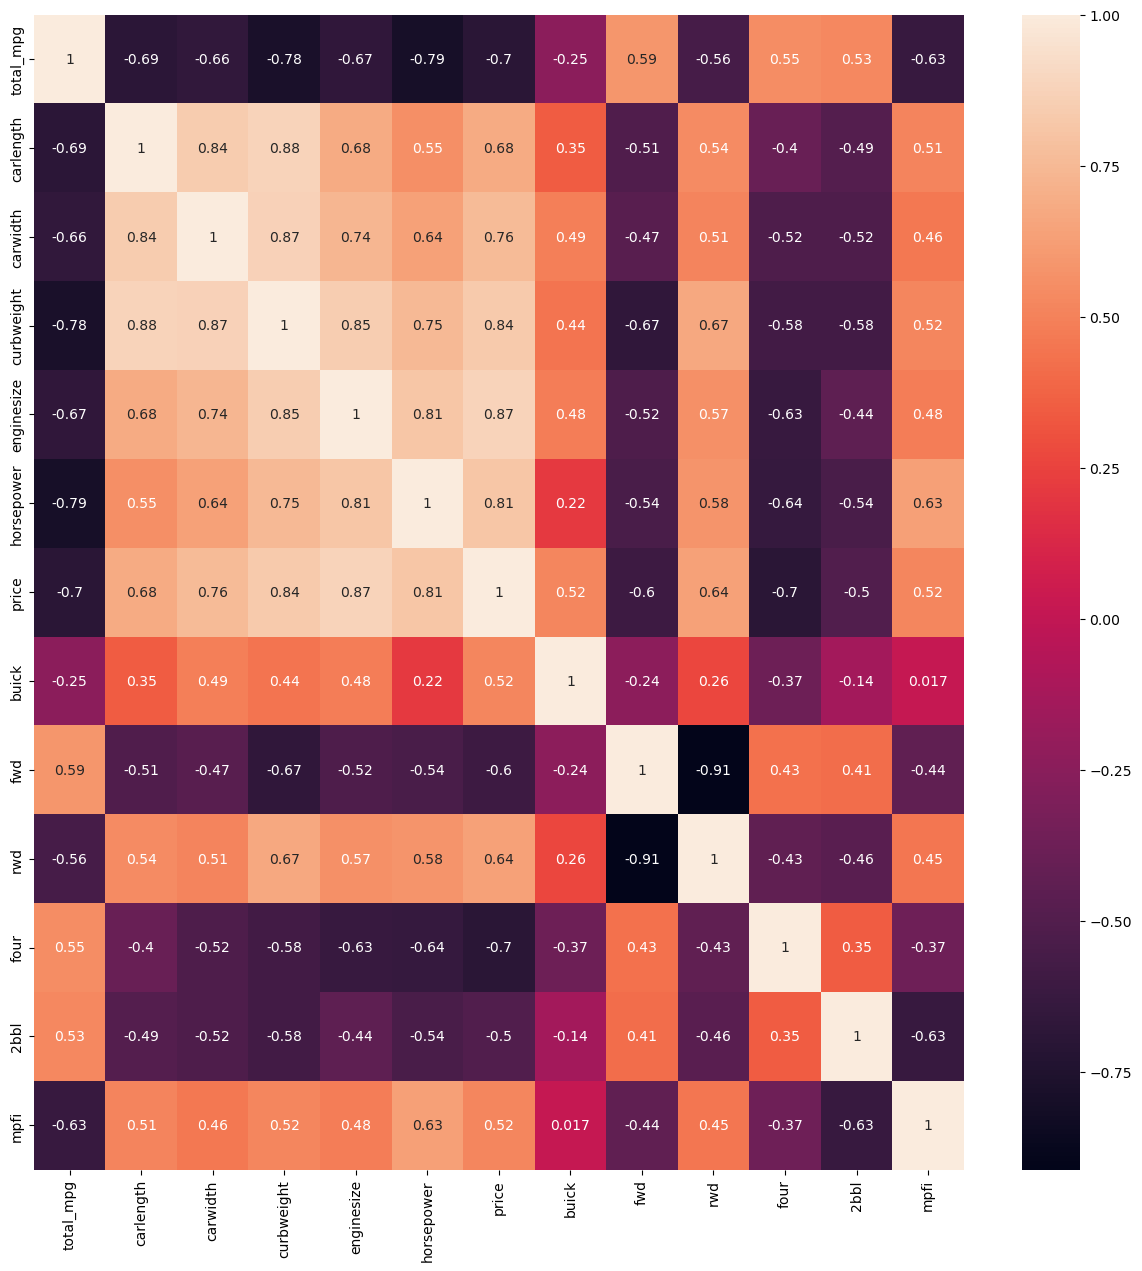

In [98]:
#Heatmap
plt.figure(figsize=[15,15])
sns.heatmap(master_df.corr(), annot=True)

In [ ]:
#Modeling

In [109]:
col_tf = ['buick', 'fwd', 'rwd', 'four', '2bbl', 'mpfi']
master_df[col_tf] = master_df[col_tf].astype(int)

In [110]:
master_df.head()

,total_mpg,carlength,carwidth,curbweight,enginesize,horsepower,price,buick,fwd,rwd,four,2bbl,mpfi
0,23.70,168.8,64.1,2548,130,111,13495.0,0,0,1,1,0,1
1,23.70,168.8,64.1,2548,130,111,16500.0,0,0,1,1,0,1
2,22.15,171.2,65.5,2823,152,154,16500.0,0,0,1,0,0,1
3,26.70,176.6,66.2,2337,109,102,13950.0,0,1,0,1,0,1
4,19.80,176.6,66.4,2824,136,115,17450.0,0,0,0,0,0,1


In [111]:
#Train Test Split
df_train, df_test = train_test_split(master_df, train_size=0.7, test_size=0.3, random_state=100)

In [112]:
print(df_train.shape)
print(df_test.shape)

(143, 13)
(62, 13)


In [113]:
y_train = df_train.pop('price')
X_train = df_train

In [114]:
master_df.head()

,total_mpg,carlength,carwidth,curbweight,enginesize,horsepower,price,buick,fwd,rwd,four,2bbl,mpfi
0,23.70,168.8,64.1,2548,130,111,13495.0,0,0,1,1,0,1
1,23.70,168.8,64.1,2548,130,111,16500.0,0,0,1,1,0,1
2,22.15,171.2,65.5,2823,152,154,16500.0,0,0,1,0,0,1
3,26.70,176.6,66.2,2337,109,102,13950.0,0,1,0,1,0,1
4,19.80,176.6,66.4,2824,136,115,17450.0,0,0,0,0,0,1


In [115]:
master_df.columns

Index(['total_mpg', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower', 'price', 'buick', 'fwd', 'rwd', 'four', '2bbl', 'mpfi'],
      dtype='object')

In [116]:
#Scaling the df
scaler = MinMaxScaler()
scale_var = ['total_mpg', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower']
X_train[scale_var] = scaler.fit_transform(X_train[scale_var])

In [117]:
#Model 1
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     69.45
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.71e-50
Time:                        15:21:03   Log-Likelihood:                -1340.9
No. Observations:                 143   AIC:                             2708.
Df Residuals:                     130   BIC:                             2746.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3255.7978   2455.074      1.326      0.187   -1601.272    8112.867
total_mpg   2455.3040   2779.792      0.883      0.379   -3044.181    7954.789
carlength   1350.1145   3529.031      0.383      0.703   -5631.651    8331.881
carwidth    7157.9854   3418.139      2.094      0.038     395.607    1.39e+04
curbweight  1331.3838   5330.750      0.250      0.803   -9214.868    1.19e+04
enginesize  1.633e+04   4465.300      3.656      0.000    7492.481    2.52e+04
horsepower  9563.7416   4105.994      2.329      0.021    1440.524    1.77e+04
buick       4791.8307   1762.312      2.719      0.007    1305.308    8278.354
fwd        -1170.4969   1311.395     -0.893      0.374   -3764.935    1423.941
rwd         1473.2638   1257.159      1.172      0.243   -1013.875    3960.403
four       -2430.8700    816.507     -2.977      0.003   -4046.231    -815.509
2bbl        -200.9731    811.783     -0.248      0.805   -1806.989    1405.043
mpfi         306.0891    824.320      0.371      0.711   -1324.729    1936.907
==============================================================================
Omnibus:                       47.244   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.343
Skew:                           1.083   Prob(JB):                     4.71e-47
Kurtosis:                       8.578   Cond. No.                         47.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
#Variance Inflation Factor
VIF = pd.DataFrame()
VIF['Features'] = X_train_sm.columns
VIF['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for  i in range(X_train_sm.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by="VIF", ascending=False)
VIF

,Features,VIF
0,const,95.94
4,curbweight,20.05
2,carlength,8.26
5,enginesize,7.53
6,horsepower,7.30
8,fwd,6.60
3,carwidth,6.29
9,rwd,5.72
1,total_mpg,4.22
12,mpfi,2.67


In [119]:
#Remove feature with high p value and retrain the model
x2 = X_train.drop('curbweight', axis=1)

In [120]:
#Model 2
X_train_sm = sm.add_constant(x2)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     76.30
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.97e-51
Time:                        15:35:18   Log-Likelihood:                -1340.9
No. Observations:                 143   AIC:                             2706.
Df Residuals:                     131   BIC:                             2741.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3481.1003   2275.148      1.530      0.128   -1019.686    7981.886
total_mpg   2333.4855   2726.855      0.856      0.394   -3060.883    7727.854
carlength   1830.0294   2949.413      0.620      0.536   -4004.613    7664.672
carwidth    7349.9338   3318.676      2.215      0.029     784.801    1.39e+04
enginesize  1.695e+04   3699.780      4.580      0.000    9626.964    2.43e+04
horsepower  9648.7817   4077.182      2.367      0.019    1583.144    1.77e+04
buick       4864.1956   1732.098      2.808      0.006    1437.692    8290.699
fwd        -1318.8780   1164.909     -1.132      0.260   -3623.346     985.590
rwd         1413.5370   1229.780      1.149      0.252   -1019.261    3846.335
four       -2423.6523    813.070     -2.981      0.003   -4032.098    -815.207
2bbl        -266.6025    765.323     -0.348      0.728   -1780.594    1247.389
mpfi         251.3764    791.829      0.317      0.751   -1315.051    1817.803
==============================================================================
Omnibus:                       46.407   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.306
Skew:                           1.070   Prob(JB):                     4.32e-45
Kurtosis:                       8.451   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#Variance Inflation Factor 2
VIF = pd.DataFrame()
VIF['Features'] = X_train_sm.columns
VIF['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for  i in range(X_train_sm.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by="VIF", ascending=False)
VIF

,Features,VIF
0,const,82.99
5,horsepower,7.25
3,carwidth,5.97
2,carlength,5.81
8,rwd,5.51
7,fwd,5.25
4,enginesize,5.21
1,total_mpg,4.09
11,mpfi,2.48
10,2bbl,2.14


In [125]:
#Remove feature with high p value and retrain the model
x3 = x2.drop('total_mpg', axis=1)

In [126]:
#Model 2
X_train_sm = sm.add_constant(x3)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     84.03
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.99e-52
Time:                        15:36:47   Log-Likelihood:                -1341.3
No. Observations:                 143   AIC:                             2705.
Df Residuals:                     132   BIC:                             2737.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4708.5810   1764.216      2.669      0.009    1218.787    8198.375
carlength    805.3530   2692.676      0.299      0.765   -4521.027    6131.733
carwidth    7630.9025   3299.044      2.313      0.022    1105.067    1.42e+04
enginesize  1.784e+04   3545.105      5.033      0.000    1.08e+04    2.49e+04
horsepower  7927.8200   3543.089      2.238      0.027     919.240    1.49e+04
buick       4663.4159   1714.392      2.720      0.007    1272.178    8054.654
fwd        -1099.3937   1135.170     -0.968      0.335   -3344.871    1146.084
rwd         1588.5216   1211.430      1.311      0.192    -807.807    3984.850
four       -2353.8186    808.143     -2.913      0.004   -3952.406    -755.232
2bbl        -244.9284    764.128     -0.321      0.749   -1756.448    1266.591
mpfi         134.1106    779.090      0.172      0.864   -1407.007    1675.228
==============================================================================
Omnibus:                       48.261   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.702
Skew:                           1.121   Prob(JB):                     6.49e-47
Kurtosis:                       8.538   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
#Variance Inflation Factor 2
VIF = pd.DataFrame()
VIF['Features'] = X_train_sm.columns
VIF['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for  i in range(X_train_sm.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by="VIF", ascending=False)
VIF

,Features,VIF
0,const,50.00
2,carwidth,5.91
4,horsepower,5.49
7,rwd,5.36
6,fwd,4.99
1,carlength,4.85
3,enginesize,4.79
10,mpfi,2.40
9,2bbl,2.13
8,four,2.01


In [128]:
#Remove feature with high p value and retrain the model
x4 = x3.drop('carlength', axis=1)

In [129]:
#Model 4
X_train_sm = sm.add_constant(x4)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     94.00
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           3.13e-53
Time:                        15:38:00   Log-Likelihood:                -1341.4
No. Observations:                 143   AIC:                             2703.
Df Residuals:                     133   BIC:                             2732.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4805.4869   1728.263      2.781      0.006    1387.050    8223.924
carwidth    8328.1673   2326.261      3.580      0.000    3726.913    1.29e+04
enginesize  1.818e+04   3346.288      5.433      0.000    1.16e+04    2.48e+04
horsepower  7536.8412   3281.827      2.297      0.023    1045.514     1.4e+04
buick       4558.8641   1672.621      2.726      0.007    1250.485    7867.243
fwd        -1150.9579   1118.154     -1.029      0.305   -3362.623    1060.708
rwd         1602.2285   1206.412      1.328      0.186    -784.008    3988.465
four       -2338.9765    803.852     -2.910      0.004   -3928.965    -748.988
2bbl        -235.5089    760.860     -0.310      0.757   -1740.461    1269.443
mpfi         194.0333    750.307      0.259      0.796   -1290.045    1678.112
==============================================================================
Omnibus:                       49.625   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.340
Skew:                           1.153   Prob(JB):                     5.24e-49
Kurtosis:                       8.657   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
#Variance Inflation Factor 2
VIF = pd.DataFrame()
VIF['Features'] = X_train_sm.columns
VIF['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for  i in range(X_train_sm.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by="VIF", ascending=False)
VIF

,Features,VIF
0,const,48.31
6,rwd,5.35
5,fwd,4.88
3,horsepower,4.74
2,enginesize,4.30
1,carwidth,2.96
9,mpfi,2.24
8,2bbl,2.13
7,four,2.00
4,buick,1.53


In [131]:
#Remove feature with high p value and retrain the model
x5 = x4.drop('fwd', axis=1)

In [132]:
#Model 5
X_train_sm = sm.add_constant(x5)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     105.6
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           4.97e-54
Time:                        15:38:41   Log-Likelihood:                -1341.9
No. Observations:                 143   AIC:                             2702.
Df Residuals:                     134   BIC:                             2729.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3723.8592   1372.424      2.713      0.008    1009.444    6438.275
carwidth    8438.5455   2324.304      3.631      0.000    3841.476     1.3e+04
enginesize  1.786e+04   3332.360      5.359      0.000    1.13e+04    2.45e+04
horsepower  7728.1009   3277.291      2.358      0.020    1246.191    1.42e+04
buick       4591.4055   1672.693      2.745      0.007    1283.110    7899.701
rwd         2623.4798    686.505      3.822      0.000    1265.693    3981.266
four       -2391.1995    802.428     -2.980      0.003   -3978.262    -804.137
2bbl        -165.6374    757.995     -0.219      0.827   -1664.819    1333.544
mpfi         277.7395    746.053      0.372      0.710   -1197.823    1753.302
==============================================================================
Omnibus:                       47.743   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.480
Skew:                           1.109   Prob(JB):                     3.25e-46
Kurtosis:                       8.499   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
#Variance Inflation Factor 2
VIF = pd.DataFrame()
VIF['Features'] = X_train_sm.columns
VIF['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for  i in range(X_train_sm.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by="VIF", ascending=False)
VIF

,Features,VIF
0,const,30.45
3,horsepower,4.72
2,enginesize,4.26
1,carwidth,2.95
8,mpfi,2.22
7,2bbl,2.11
6,four,2.00
5,rwd,1.73
4,buick,1.53


In [134]:
#Remove feature with high p value and retrain the model
x6 = x5.drop('2bbl', axis=1)

In [135]:
#Model 6
X_train_sm = sm.add_constant(x6)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     121.5
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           4.44e-55
Time:                        15:39:30   Log-Likelihood:                -1342.0
No. Observations:                 143   AIC:                             2700.
Df Residuals:                     135   BIC:                             2724.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3571.8947   1179.007      3.030      0.003    1240.181    5903.608
carwidth    8567.3478   2240.381      3.824      0.000    4136.563     1.3e+04
enginesize  1.776e+04   3289.835      5.399      0.000    1.13e+04    2.43e+04
horsepower  7793.5321   3252.053      2.396      0.018    1361.972    1.42e+04
buick       4603.6220   1665.852      2.764      0.007    1309.079    7898.165
rwd         2649.0145    674.096      3.930      0.000    1315.859    3982.170
four       -2389.0591    799.533     -2.988      0.003   -3970.290    -807.829
mpfi         351.8170    662.240      0.531      0.596    -957.889    1661.523
==============================================================================
Omnibus:                       47.528   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.807
Skew:                           1.104   Prob(JB):                     7.50e-46
Kurtosis:                       8.477   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
#Variance Inflation Factor 2
VIF = pd.DataFrame()
VIF['Features'] = X_train_sm.columns
VIF['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for  i in range(X_train_sm.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by="VIF", ascending=False)
VIF

,Features,VIF
0,const,22.63
3,horsepower,4.68
2,enginesize,4.18
1,carwidth,2.76
6,four,2.00
7,mpfi,1.76
5,rwd,1.68
4,buick,1.52


In [137]:
#Remove feature with high p value and retrain the model
x7 = x6.drop('mpfi', axis=1)

In [138]:
#Model 6
X_train_sm = sm.add_constant(x7)
lr = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           4.09e-56
Time:                        15:40:15   Log-Likelihood:                -1342.1
No. Observations:                 143   AIC:                             2698.
Df Residuals:                     136   BIC:                             2719.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3540.7444   1174.437      3.015      0.003    1218.224    5863.264
carwidth    8701.5145   2220.219      3.919      0.000    4310.896    1.31e+04
enginesize  1.774e+04   3280.961      5.408      0.000    1.13e+04    2.42e+04
horsepower  8349.7166   3070.791      2.719      0.007    2277.041    1.44e+04
buick       4432.2772   1630.013      2.719      0.007    1208.828    7655.726
rwd         2680.1238    669.774      4.002      0.000    1355.605    4004.642
four       -2392.6559    797.392     -3.001      0.003   -3969.547    -815.765
==============================================================================
Omnibus:                       47.093   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.356
Skew:                           1.105   Prob(JB):                     5.13e-44
Kurtosis:                       8.346   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#Variance Inflation Factor 2
VIF = pd.DataFrame()
VIF['Features'] = X_train_sm.columns
VIF['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for  i in range(X_train_sm.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by="VIF", ascending=False)
VIF

,Features,VIF
0,const,22.58
3,horsepower,4.20
2,enginesize,4.18
1,carwidth,2.73
6,four,2.00
5,rwd,1.67
4,buick,1.47


In [140]:
#Look at the residuals
y_train_pred =lr_model_1.predict(X_train_sm)
y_train_pred

122     6859.050231
125    18959.964786
166    11214.980618
1      13395.154926
199    17417.360954
           ...     
87     10492.615056
103    19688.933046
67     28681.792794
24      6323.437188
8      19476.984107
Length: 143, dtype: float64

In [142]:
#R2 score
r2_score(y_true=y_train, y_pred = y_train_pred)

0.8627293868208303

Text(0, 0.5, 'Car Price')

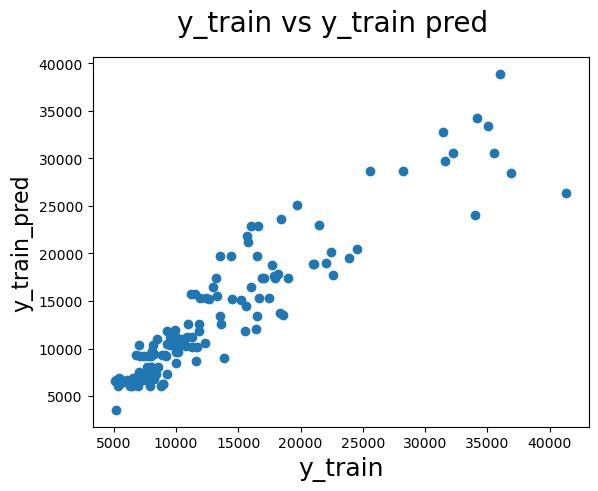

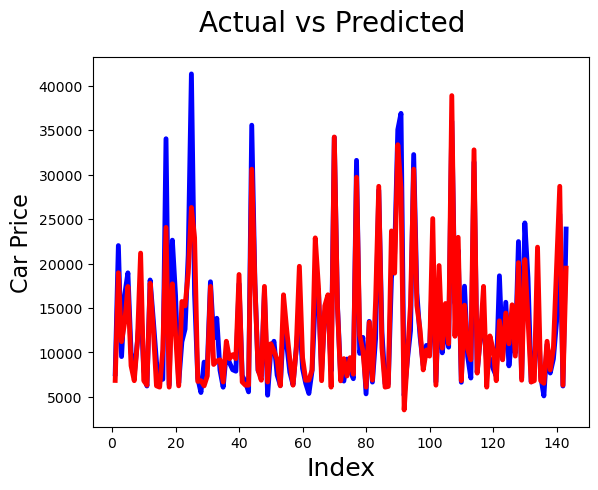

In [143]:
#Actual vs Predicted Plot
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
c = [i for i in range(1, 144,1)]
fig = plt.figure()
plt.plot(c, y_train, color='blue', linewidth=3.5, linestyle="-")
plt.plot(c, y_train_pred, color='red',linewidth=3.5, linestyle="-" )
fig.suptitle('Actual vs Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Car Price', fontsize=16)

Text(0, 0.5, 'Car Price')

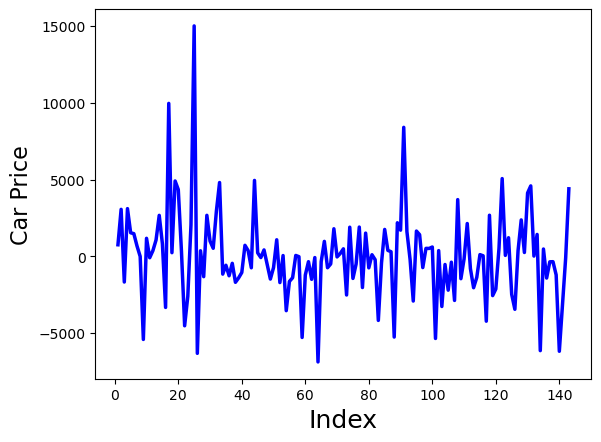

In [144]:
#Error terms
res = y_train-y_train_pred
plt.plot(c, res,color='blue', linewidth=2.5, linestyle="-")
fig.suptitle('Error Term', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Car Price', fontsize=16)

In [145]:
#Calculate predictions on test data
y_test = df_test.pop('price')
X_test = df_test

In [146]:
#Scaling the df
scaler = MinMaxScaler()
scale_var = ['total_mpg', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower']
X_test[scale_var] = scaler.fit_transform(X_test[scale_var])

In [147]:
X_test.drop(['total_mpg', 'carlength', 'mpfi', '2bbl', 'fwd', 'curbweight'], axis=1, inplace=True)

In [148]:
#Prediction
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model_1.predict(X_test_sm)

In [149]:
#Evaluate the model
r2score = r2_score(y_true = y_test, y_pred=y_test_pred)
print('r2_score:', r2score)

r2_score: 0.8308147121564831


Text(0, 0.5, 'y_pred')

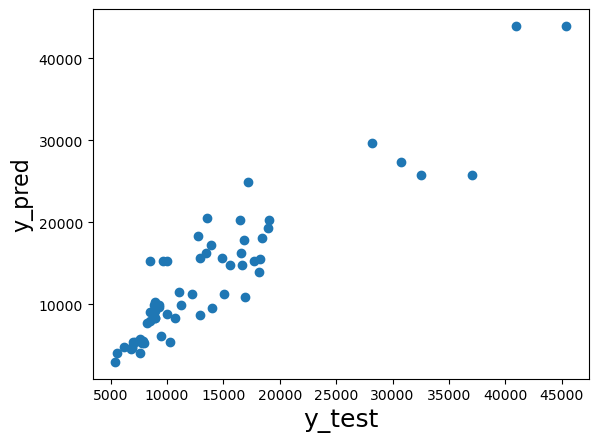

In [150]:
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)